In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create model class
class Net(nn.Module):
    # input layer (4 features of flower ) -> 
    # Hidden Layer 1 --> 
    # Hidden Layer 2 --> 
    # Output Layer (3 classes of iris flowers)
    def __init__(self, input_features=4, h1 = 8, h2 = 9, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [48]:
# Set random seed
torch.manual_seed(41)

# Create instance of model
model = Net()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

my_df['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0, 1, 2], inplace=True)


/var/folders/82/7lqs1spx1m94c3m200nj49l40000gn/T/ipykernel_69019/2827912310.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_df['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0, 1, 2], inplace=True)
/var/folders/82/7lqs1spx1m94c3m200nj49l40000gn/T/ipykernel_69019/2827912310.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

In [44]:
import torch
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(y_train)



tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])


In [50]:
# Set criterion of our model to measure the error 
criterion = nn.CrossEntropyLoss()

# Chose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print(model.parameters)

# Train the model
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    print(y_pred)
    
    # loss = criterion(y_pred, y_train)
    # losses.append(loss.detach().numpy())
    
    # if i % 10 == 0:
    #     print(f'Epoch {i} and loss is: {loss}')
    
    

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>
tensor([[0.2061, 0.2112, 0.2420],
        [0.2152, 0.1794, 0.2581],
        [0.2283, 0.1649, 0.1136],
        [0.2354, 0.1717, 0.1448],
        [0.2041, 0.1619, 0.2825],
        [0.1575, 0.2862, 0.4146],
        [0.1975, 0.1681, 0.3142],
        [0.2154, 0.1773, 0.2551],
        [0.2165, 0.1537, 0.2678],
        [0.2234, 0.1593, 0.1934],
        [0.2175, 0.1844, 0.2388],
        [0.2329, 0.1692, 0.1638],
        [0.1835, 0.2620, 0.3094],
        [0.2299, 0.1381, 0.2104],
        [0.2211, 0.1392, 0.2186],
        [0.1729, 0.2668, 0.3620],
        [0.2400, 0.1428, 0.1999],
        [0.1932, 0.2248, 0.2348],
        [0.1726, 0.2746, 0.2970],
        [0.2132, 0.1860, 0.2382],
        [0.2269, 0.1530, 0.2087],
        [0.2121, 0.1964, 0.2281],
        [0.2379, 0.1373, 0.2491],
 

In [52]:
# Set criterion of our model to measure the error 
criterion = nn.CrossEntropyLoss()

# Chose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')
        
    # Optimize the model
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    
    

Epoch 0 and loss is: 1.125203251838684
Epoch 10 and loss is: 1.0097211599349976
Epoch 20 and loss is: 0.8162347078323364
Epoch 30 and loss is: 0.585993230342865
Epoch 40 and loss is: 0.4003389775753021
Epoch 50 and loss is: 0.26794716715812683
Epoch 60 and loss is: 0.1796349734067917
Epoch 70 and loss is: 0.12165624648332596
Epoch 80 and loss is: 0.0860651433467865
Epoch 90 and loss is: 0.06522615253925323


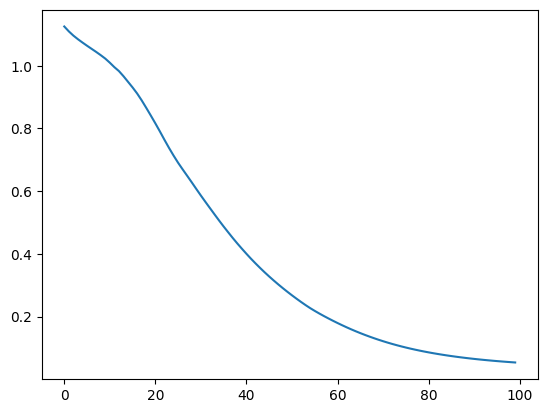

In [53]:
plt.plot(range(epochs), losses)


In [54]:
with torch.no_grad(): # turn off back prop ( speed )

    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    
    correct = (y_eval.argmax(1) == y_test).float().sum()
    
    print('loss: ', loss)
print(f'{correct.item()}/{len(y_test)} correct')
    

loss:  tensor(0.1315)
28.0/30 correct


In [55]:
with torch.no_grad(): # turn off back prop ( speed )
    
    loss = criterion(y_eval, y_test)
    
    correct = (y_eval.argmax(1) == y_test).float().sum()
    
    for i in range(len(y_test)):
        print(f'{i+1}.) Predicted: {y_eval[i].argmax().item()}, Actual: {y_test[i]}')
    
    print('loss: ', loss)

1.) Predicted: 2, Actual: 2
2.) Predicted: 2, Actual: 2
3.) Predicted: 2, Actual: 2
4.) Predicted: 1, Actual: 1
5.) Predicted: 2, Actual: 2
6.) Predicted: 1, Actual: 1
7.) Predicted: 2, Actual: 2
8.) Predicted: 1, Actual: 1
9.) Predicted: 2, Actual: 2
10.) Predicted: 2, Actual: 2
11.) Predicted: 2, Actual: 2
12.) Predicted: 0, Actual: 0
13.) Predicted: 0, Actual: 0
14.) Predicted: 1, Actual: 1
15.) Predicted: 0, Actual: 0
16.) Predicted: 1, Actual: 2
17.) Predicted: 0, Actual: 0
18.) Predicted: 2, Actual: 1
19.) Predicted: 0, Actual: 0
20.) Predicted: 0, Actual: 0
21.) Predicted: 1, Actual: 1
22.) Predicted: 2, Actual: 2
23.) Predicted: 0, Actual: 0
24.) Predicted: 0, Actual: 0
25.) Predicted: 1, Actual: 1
26.) Predicted: 1, Actual: 1
27.) Predicted: 1, Actual: 1
28.) Predicted: 1, Actual: 1
29.) Predicted: 0, Actual: 0
30.) Predicted: 1, Actual: 1
loss:  tensor(0.1315)


In [57]:
new_iris = torch.tensor([5.2000, 3.5000, 1.5000, 0.2000])

with torch.no_grad():
    predicated = model(new_iris)
    print(torch.argmax(predicated))



tensor(0)
